<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Agglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agglomerative Project-Mall Customer

### Agglomerative clustering is a type of hierarchical clustering algorithm that builds nested clusters by merging or 'agglomerating' them successively. This method builds a hierarchy of clusters in a bottom-up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

### Agglomerative clustering is particularly useful when the structure of the clusters is unknown and when you want to perform exploratory data analysis to understand the hierarchical structure of the data. However, it can be computationally expensive for large datasets because of the need to compute and update the proximity matrix at each iteration.









## About Dataset:
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv

This file contains the basic information (ID, age, gender, income, spending score) about the customers

1-CustomerID Unique ID assigned to the customer

2-Gender Gender of the customer

3-Age Age of the customer

4-Annual Income (k$) Annual Income of the customee

5-Spending Score (1-100) Score assigned by the mall based on customer behavior and spending nature



## Import libraries

In [90]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get Dataset

In [91]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.shape

(200, 5)

In [94]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [95]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [97]:
df.describe(include= "all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


## Clean Data

In [98]:
df = df.drop('CustomerID',axis =1)

## Visualization

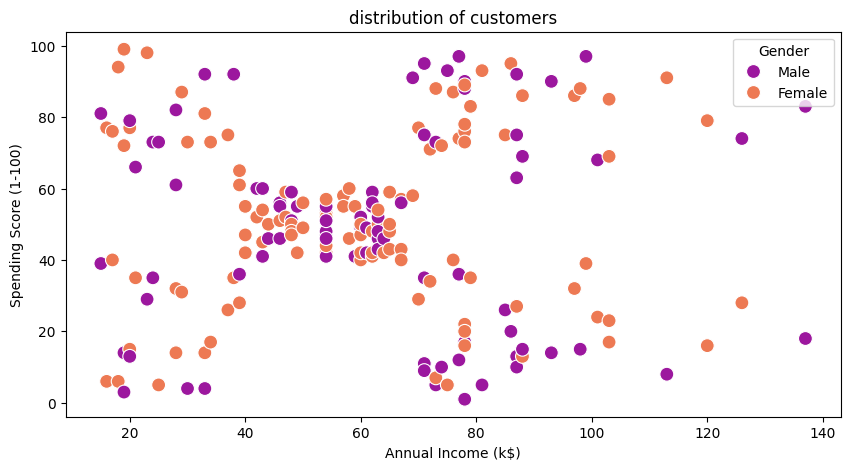

In [99]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x ='Annual Income (k$)',y='Spending Score (1-100)',hue = 'Gender',palette='plasma',s = 100)
plt.title('distribution of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Build Model

In [100]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [101]:
X= X.to_numpy()

## Dandrogram

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage

### the linkage parameter is set to 'ward'. Here's what the different linkage criteria mean:


*   Ward: The Ward’s linkage minimizes the total within-cluster variance. At each step, it finds the pair of clusters that leads to a minimum increase in total within-cluster variance after merging. This often results in clusters that are relatively compact and with a relatively small number of clusters.
*   Complete (or maximum) linkage: This method finds the pair of clusters with the smallest maximum distance between their individual components. It tends to create more equally sized clusters, but can be more sensitive to outliers than Ward linkage.

*   Average linkage: This method finds the pair of clusters with the smallest average distance between all the points in one cluster to all the points in the other cluster. It is generally less affected by outliers than the complete linkage.
*   Single (or minimum) linkage: This method finds the pair of clusters with the smallest minimum distance between their individual components. This can result in a chaining effect where clusters may be long and straggly, rather than compact and globular.








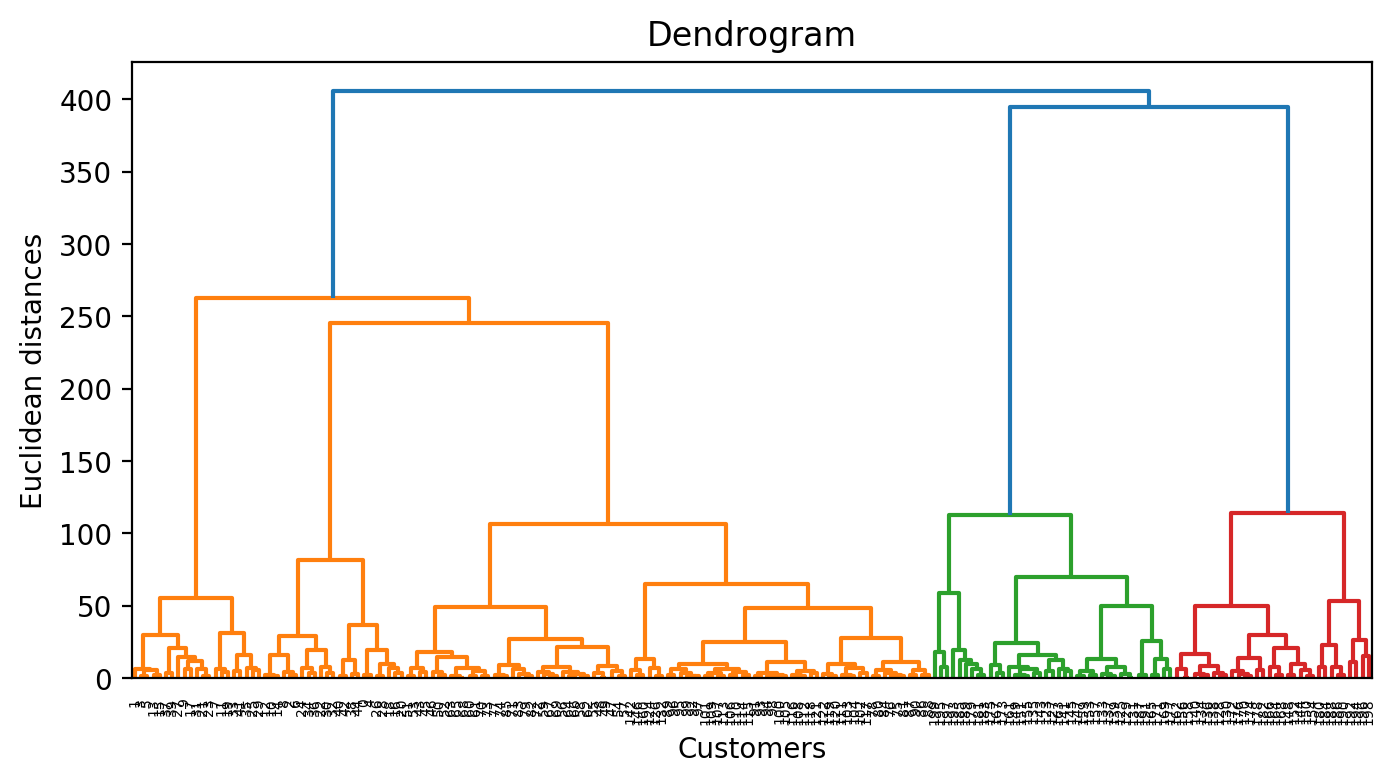

In [103]:
plt.figure(figsize=(8,4), dpi = 200)
dendro = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward')) # methods can be 'complete','average' and 'single'
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## The dendrogram can be used to decide on the number of clusters that best represents the data. One common method is to look for a large jump in the distance, which would suggest a natural grouping.

### In the dendrogram, it looks like cutting the dendrogram at a height of approximately **150** or **K=5** would yield a reasonable number of clusters.

## Build Agglomerative Model

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
agl = AgglomerativeClustering(n_clusters= 5 , linkage='ward',affinity = 'euclidean')
y_agl = agl.fit_predict(X)

In [106]:
print(y_agl)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


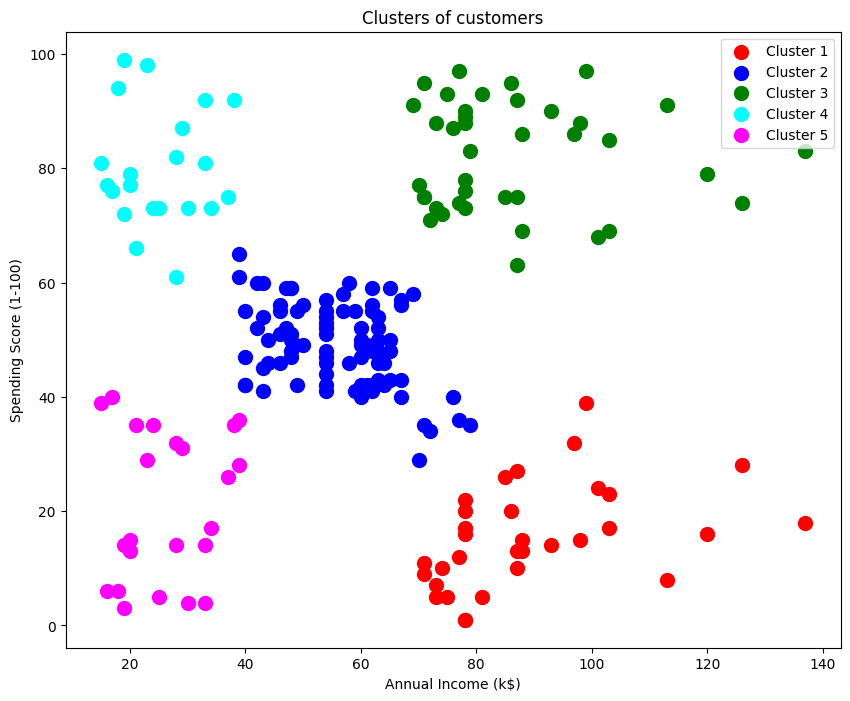

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_agl == 0, 0], X[y_agl == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_agl == 1, 0], X[y_agl == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_agl == 2, 0], X[y_agl == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_agl == 3, 0], X[y_agl == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_agl == 4, 0], X[y_agl == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## By identifying these clusters, a business can tailor its marketing strategies accordingly. For example:


*   For Cluster 1, businesses might offer value deals or credit options.
*   Cluster 2 might be targeted with loyalty programs and quality products at a mid-range price.
*   Cluster 3 could be the focus of luxury and premium product marketing.
*   Cluster 4 might be more interested in high-value investments or luxury items that represent status but also offer long-term value.
*   Cluster 5 could be the main audience for discounts, coupons, and budget-oriented marketing campaigns.

### It's important to note that this is a simplification and further analysis would be necessary to truly understand the purchasing behavior and demographics within each cluster.









